<a href="https://colab.research.google.com/github/af-pedro/Case-Study-1-How-Does-a-Bike-Share-Navigate-Speedy-Success-/blob/main/Case_Study_1_How_Does_a_Bike_Share_Navigate_Speedy_Success%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from google.colab import files

**Prepare**

*   Downloading and integrating different datasets;
*   Transforming and cleaning the data;
*   Selection of relevant variables


In [ ]:
# Loading files - jan.2023 to dec.2023

bikedata_jan2023 = pd.read_csv("/202301-divvy-tripdata.csv")
bikedata_fev2023 = pd.read_csv("/202302-divvy-tripdata.csv")
bikedata_mar2023 = pd.read_csv("/202303-divvy-tripdata.csv")
bikedata_abr2023 = pd.read_csv("/202304-divvy-tripdata.csv")
bikedata_mai2023 = pd.read_csv("/202305-divvy-tripdata.csv")
bikedata_jun2023 = pd.read_csv("/202306-divvy-tripdata.csv")
bikedata_jul2023 = pd.read_csv("/202307-divvy-tripdata.csv")
bikedata_ago2023 = pd.read_csv("/202308-divvy-tripdata.csv")
bikedata_set2023 = pd.read_csv("/202309-divvy-tripdata.csv")
bikedata_out2023 = pd.read_csv("/202310-divvy-tripdata.csv")
bikedata_nov2023 = pd.read_csv("/202311-divvy-tripdata.csv")
bikedata_dec2023 = pd.read_csv("/202312-divvy-tripdata.csv")

In [ ]:
print(bikedata_jan2023.info())
print(bikedata_fev2023.info())
print(bikedata_mar2023.info())
print(bikedata_abr2023.info())
print(bikedata_mai2023.info())
print(bikedata_jun2023.info())
print(bikedata_jul2023.info())
print(bikedata_ago2023.info())
print(bikedata_set2023.info())
print(bikedata_out2023.info())
print(bikedata_nov2023.info())
print(bikedata_dec2023.info())

In [ ]:
# Concat the files

bikedata = pd.concat([bikedata_jan2023, bikedata_fev2023, bikedata_mar2023, bikedata_abr2023, bikedata_mai2023,
                     bikedata_jun2023, bikedata_jul2023, bikedata_ago2023, bikedata_set2023, bikedata_out2023,
                     bikedata_nov2023, bikedata_dec2023], ignore_index = True)

print(bikedata)

                  ride_id  rideable_type           started_at  \
0        F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
1        13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
2        BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
3        C90792D034FED968   classic_bike  2023-01-22 10:52:58   
4        3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                   ...            ...                  ...   
5719872  F74DF9549B504A6B  electric_bike  2023-12-07 13:15:24   
5719873  BCDA66E761CC1029   classic_bike  2023-12-08 18:42:21   
5719874  D2CF330F9C266683   classic_bike  2023-12-05 14:09:11   
5719875  3829A0D1E00EE970  electric_bike  2023-12-02 21:36:07   
5719876  A373F5B447AEA508   classic_bike  2023-12-11 13:07:46   

                    ended_at           start_station_name start_station_id  \
0        2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave     TA1309000058   
1        2023-01-10 15:46:05        Kimbark Ave & 53rd St     T

In [ ]:
print(bikedata.head())

            ride_id  rideable_type           started_at             ended_at  \
0  F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42  2023-01-21 20:16:33   
1  13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36  2023-01-10 15:46:05   
2  BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57  2023-01-02 08:05:11   
3  C90792D034FED968   classic_bike  2023-01-22 10:52:58  2023-01-22 11:01:44   
4  3397017529188E8A   classic_bike  2023-01-12 13:58:01  2023-01-12 14:13:20   

            start_station_name start_station_id  \
0  Lincoln Ave & Fullerton Ave     TA1309000058   
1        Kimbark Ave & 53rd St     TA1309000037   
2       Western Ave & Lunt Ave           RP-005   
3        Kimbark Ave & 53rd St     TA1309000037   
4        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Diversey Ave       202480.0  41.924074 -87.646278   
1         Greenwood Ave & 47th St   TA1308000002  41.799568 -87.

In [ ]:
print(bikedata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB
None


In [ ]:
bikedata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [ ]:
print(bikedata.describe())

          start_lat     start_lng       end_lat       end_lng
count  5.719877e+06  5.719877e+06  5.712887e+06  5.712887e+06
mean   4.190288e+01 -8.764704e+01  4.190322e+01 -8.764720e+01
std    4.505556e-02  2.733412e-02  5.444371e-02  6.919621e-02
min    4.163000e+01 -8.794000e+01  0.000000e+00 -8.816000e+01
25%    4.188096e+01 -8.766000e+01  4.188103e+01 -8.766027e+01
50%    4.189902e+01 -8.764403e+01  4.190000e+01 -8.764410e+01
75%    4.193000e+01 -8.762991e+01  4.193000e+01 -8.763000e+01
max    4.207000e+01 -8.746000e+01  4.218000e+01  0.000000e+00


In [ ]:
print(bikedata.nunique())

ride_id               5719877
rideable_type               3
started_at            4823909
ended_at              4835702
start_station_name       1592
start_station_id         1516
end_station_name         1597
end_station_id           1520
start_lat              789702
start_lng              748738
end_lat                 13884
end_lng                 14002
member_casual               2
dtype: int64


In [ ]:
# Number of null values

print(bikedata.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64


In [ ]:
# Adding the date, month, day and year columns

bikedata['date'] = pd.to_datetime(bikedata['started_at'])  # Convert to datetime if not already
bikedata['month'] = bikedata['date'].dt.strftime("%m")
bikedata['day'] = bikedata['date'].dt.strftime("%d")
bikedata['year'] = bikedata['date'].dt.strftime("%Y")
bikedata['day_of_week'] = bikedata['date'].dt.strftime("%A")

bikedata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,01,21,2023,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,01,10,2023,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,01,02,2023,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,01,22,2023,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,01,12,2023,Thursday


In [ ]:
# Now let's calculate each user's cycling time
# pd.to_datetime() is used to convert the 'ended_at' and 'started_at' columns to pandas datetime objects if they are not already.
# (all_trips['ended_at'] - all_trips['started_at']) calculates the time difference between the two columns.
# .dt.total_seconds() converts the time difference into seconds.

bikedata['ended_at'] = pd.to_datetime(bikedata['ended_at'])  # Transform to date time
bikedata['started_at'] = pd.to_datetime(bikedata['started_at'])  # Transform to date time

bikedata['ride_length'] = (bikedata['ended_at'] - bikedata['started_at']).dt.total_seconds()
#bikedata['ride_length'] = pd.to_datetime(bikedata['ride_length'], unit='s').dt.strftime("%H:%M:%S") # Transform to hour, minutes, seconds

bikedata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,01,21,2023,Saturday,651.0
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,01,10,2023,Tuesday,509.0
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,01,02,2023,Monday,794.0
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,01,22,2023,Sunday,526.0
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,01,12,2023,Thursday,919.0


In [ ]:
print(bikedata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                datetime64[ns]
 14  month               object        
 15  day                 object        
 16  year                object        
 17  day_of_week         object        
 18  ride_length         float64       
dtypes: datetime64[ns](3), float64(5), object(1

In [ ]:
# Checking the database for null values
# If there is at least one null value, .isnull().values.any() returns True; otherwise it will return False

if bikedata.isnull().values.any():
    print("There are null values in the DataFrame")
else:
    print("There are no null values in the DataFrame")

In [ ]:
# As there are null values, we will remove them to facilitate analysis

bikedata = bikedata.dropna()

if bikedata.isnull().values.any():
    print("There are null values in the DataFrame")
else:
    print("There are no null values in the DataFrame")

In [ ]:
print(bikedata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4331707 entries, 0 to 5719876
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                datetime64[ns]
 14  month               object        
 15  day                 object        
 16  year                object        
 17  day_of_week         object        
 18  ride_length         float64       
dtypes: datetime64[ns](3), float64(5), object(1

In [ ]:
# Removing duplicate IDs
# drop_duplicates() is used to remove duplicate lines based on ride IDs (ride_id).

bikedata = bikedata.drop_duplicates(subset=['ride_id'])

print(bikedata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4331707 entries, 0 to 5719876
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                datetime64[ns]
 14  month               object        
 15  day                 object        
 16  year                object        
 17  day_of_week         object        
 18  ride_length         float64       
dtypes: datetime64[ns](3), float64(5), object(1

In [ ]:
# Calculating distance between bike stations

# We will use the geopy library, which provides a function to calculate the distance between two geographic points
# geodesic() is used to calculate the geodesic distance between two points, specified by latitude and longitude coordinates.
# .apply() is used to apply the lambda function to each row of the DataFrame, calculating the distance for each trip.
# axis=1 indicates that the lambda function should be applied along the lines of the DataFrame.
# meters is used to specify that the distance should be returned in meters.

bikedata['ride_distance'] = bikedata.apply(lambda row: geodesic((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).meters, axis=1)



In [ ]:
bikedata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length,ride_distance
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,01,21,2023,Saturday,651.0,839.312761
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,01,10,2023,Tuesday,509.0,1203.673927
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,01,02,2023,Monday,794.0,3540.392286
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,01,22,2023,Sunday,526.0,1203.673927
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,01,12,2023,Thursday,919.0,1203.673927


In [ ]:
bikedata.to_csv('BikeSharingData.csv', index=False)

# Baixar o arquivo usando a função files
files.download('BikeSharingData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from google.colab import files

In [2]:
bikedata = pd.read_csv('/content/drive/MyDrive/BikeSharingData.csv')

**Descritive analysis and Exploratory Data Analysis (EDA)**

In [ ]:
bikedata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length,ride_distance
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,1,21,2023,Saturday,651.0,839.312761
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,1,10,2023,Tuesday,509.0,1203.673927
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,1,2,2023,Monday,794.0,3540.392286
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,1,22,2023,Sunday,526.0,1203.673927
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,1,12,2023,Thursday,919.0,1203.673927


In [ ]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331707 entries, 0 to 4331706
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  date                object 
 14  month               int64  
 15  day                 int64  
 16  year                int64  
 17  day_of_week         object 
 18  ride_length         float64
 19  ride_distance       float64
dtypes: float64(6), int64(3), object(11)
memory usage: 661.0+ MB


In [ ]:
bikedata['ride_distance'].describe()

count    4.331707e+06
mean     2.064642e+03
std      8.373893e+03
min      0.000000e+00
25%      8.653234e+02
50%      1.521886e+03
75%      2.674941e+03
max      9.818680e+06
Name: ride_distance, dtype: float64

In [ ]:
# ride_length in seconds

bikedata['ride_length'].describe()

count    4.331707e+06
mean     9.571109e+02
std      2.165232e+03
min     -3.274000e+03
25%      3.370000e+02
50%      5.880000e+02
75%      1.049000e+03
max      7.281780e+05
Name: ride_length, dtype: float64

In [ ]:
# Assuming that 'df' is your DataFrame and 'column_seconds' is the column with values in seconds
df_hours = bikedata.copy()  # Create a copy of the original DataFrame

# Transform values in seconds to hours
df_hours['ride_length'] = df_hours['ride_length'] / 3600  # 3600 seconds in an hour

# Use describe() on the column converted to hours
describe_hours = df_hours['ride_length'].describe()

print(describe_hours)

count    4.331707e+06
mean     2.658641e-01
std      6.014532e-01
min     -9.094444e-01
25%      9.361111e-02
50%      1.633333e-01
75%      2.913889e-01
max      2.022717e+02
Name: ride_length, dtype: float64


<ipython-input-3-b7daae3399af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bikedata.corr()


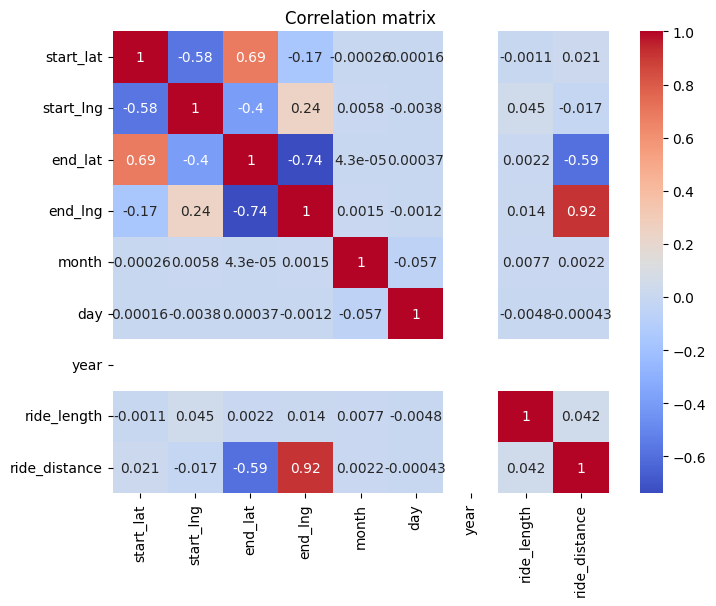

In [ ]:
correlation = bikedata.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Bike type

bikedata['rideable_type'].value_counts()

classic_bike     2690744
electric_bike    1564839
docked_bike        76124
Name: rideable_type, dtype: int64

<Axes: >

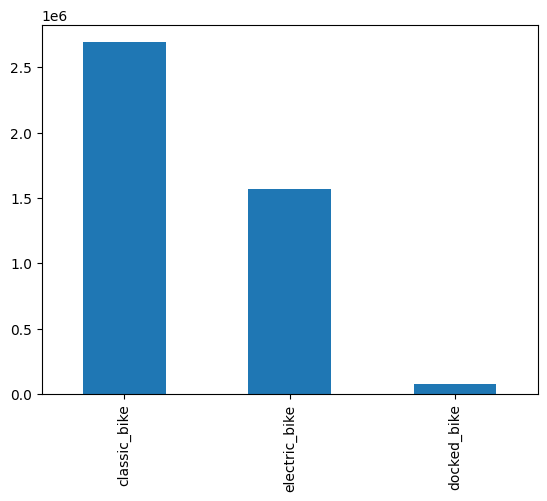

In [ ]:
# Bike type plot

bikedata['rideable_type'].value_counts().plot(kind = 'bar')

In [ ]:
# Start Station

bikedata['start_station_name'].value_counts()

Streeter Dr & Grand Ave                   59614
DuSable Lake Shore Dr & Monroe St         38014
Michigan Ave & Oak St                     34780
DuSable Lake Shore Dr & North Blvd        33163
Clark St & Elm St                         32967
                                          ...  
Public Rack - Vincennes Ave & 77th St         1
Public Rack - Claremont Ave & 71st St         1
Public Rack - Throop St & 48t ST              1
Public Rack - Torrence Ave  & 106th St        1
Public Rack - Champlain Ave & 134th St        1
Name: start_station_name, Length: 1534, dtype: int64

In [ ]:
# Final station

bikedata['end_station_name'].value_counts()

Streeter Dr & Grand Ave                      61713
DuSable Lake Shore Dr & North Blvd           37301
DuSable Lake Shore Dr & Monroe St            36211
Michigan Ave & Oak St                        35775
Clark St & Elm St                            32314
                                             ...  
Public Rack - New England Ave & Grace St         1
Public Rack - Kenneth Ave & 63rd St E            1
Public Rack - Cottage Grove Ave & 92nd St        1
Public Rack - Langley Ave & 105th Pl             1
Public Rack - Honore St & 87th St                1
Name: end_station_name, Length: 1557, dtype: int64

In [ ]:
# Member and casual

bikedata['member_casual'].value_counts()

member    2799950
casual    1531757
Name: member_casual, dtype: int64

<Axes: >

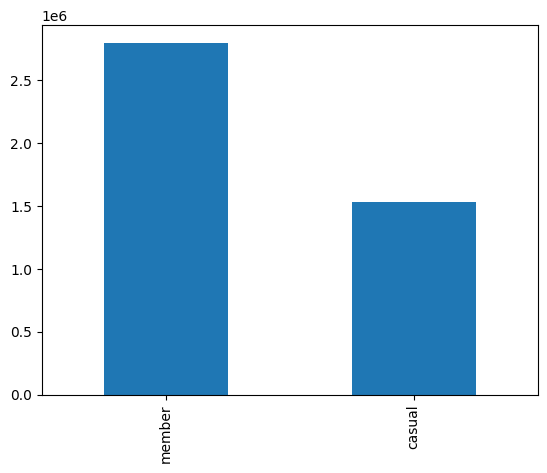

In [ ]:
# Members and casual plot

bikedata['member_casual'].value_counts().plot(kind = 'bar')

In [ ]:
# month

bikedata['month'].value_counts()

8     584919
7     573958
6     534758
9     506635
5     463227
10    403781
4     324197
11    274798
3     200447
12    167143
2     149560
1     148284
Name: month, dtype: int64

<Axes: >

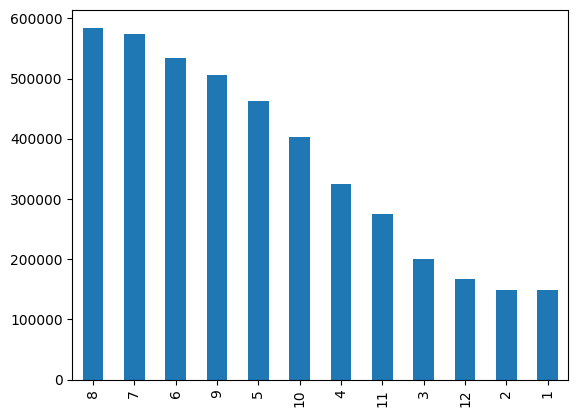

In [ ]:
bikedata['month'].value_counts().plot(kind = 'bar')

In [ ]:
# Day

bikedata['day'].value_counts()

15    162271
10    159746
9     158452
4     157740
7     155767
20    155140
21    154464
3     151666
18    146894
8     143713
23    143509
24    142548
6     142345
12    140931
19    139413
16    138441
2     137938
27    137762
13    137580
30    136897
11    135085
22    134781
28    134299
14    134266
5     133889
1     133615
17    133519
29    129080
26    125309
25    120932
31     73715
Name: day, dtype: int64

<Axes: >

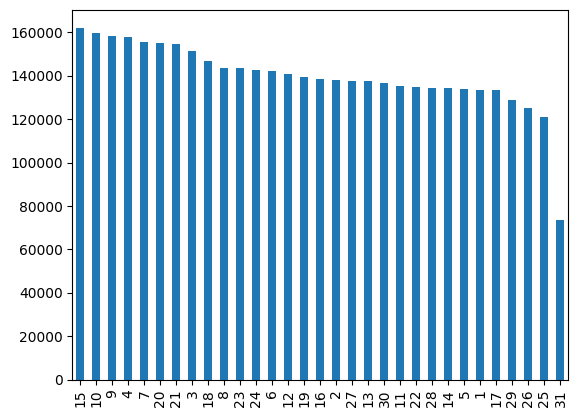

In [ ]:
bikedata['day'].value_counts().plot(kind = 'bar')

In [ ]:
# Day of week

bikedata['day_of_week'].value_counts()

Saturday     660811
Thursday     651591
Wednesday    635813
Tuesday      630387
Friday       628376
Sunday       562631
Monday       562098
Name: day_of_week, dtype: int64

<Axes: >

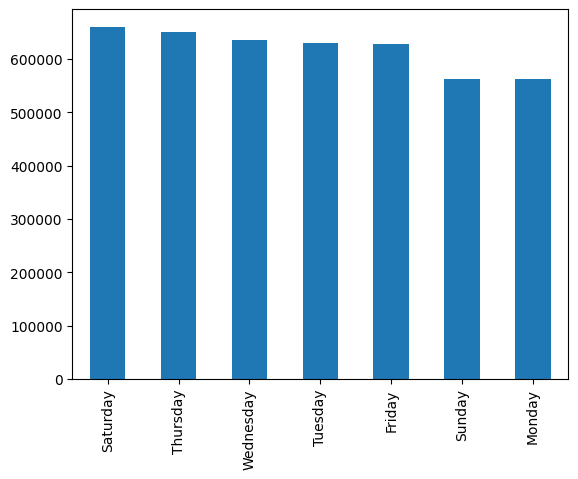

In [ ]:
bikedata['day_of_week'].value_counts().plot(kind = 'bar')

**How do annual members and casual riders use Cyclistic bikes differently?**

In [ ]:
bike_grp =bikedata.groupby(['member_casual'])
bike_grp['rideable_type'].value_counts()

member_casual  rideable_type
casual         classic_bike      873025
               electric_bike     582608
               docked_bike        76124
member         classic_bike     1817719
               electric_bike     982231
Name: rideable_type, dtype: int64

<Axes: xlabel='member_casual,rideable_type'>

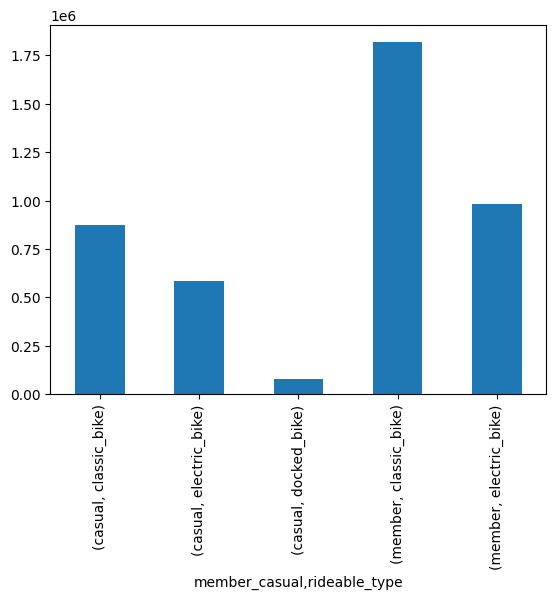

In [ ]:
bike_grp['rideable_type'].value_counts().plot(kind = 'bar')

**Distribution of service usage between members x casual per month**

In [ ]:
bike_grp['month'].value_counts()

member_casual  month
casual         7        245294
               8        233856
               6        219794
               9        196964
               5        177039
               10       130300
               4        110538
               11        72097
               3         46792
               12        36686
               2         32776
               1         29621
member         8        351063
               7        328664
               6        314964
               9        309671
               5        286188
               10       273481
               4        213659
               11       202701
               3        153655
               12       130457
               1        118663
               2        116784
Name: month, dtype: int64

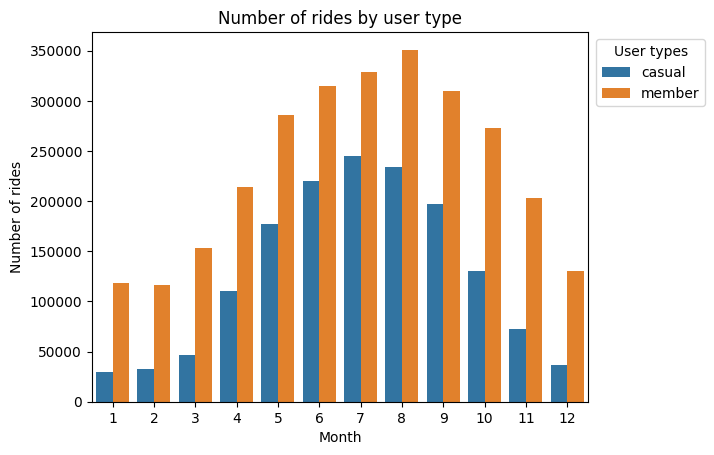

In [ ]:
# Aggregating the data and maintaining the groups
grouped_data = bikedata.groupby(['member_casual', 'month']).size().reset_index(name='number_of_rides')

# Plotting the graph
sns.barplot(data=grouped_data, x='month', y='number_of_rides', hue='member_casual', dodge=True)
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.title('Number of rides by user type')
plt.legend(title='User types', loc='upper right', bbox_to_anchor=(1.25, 1))

# Calculando as médias de corridas dos membros e dos usuários casuais após a agregação dos dados
#mean_member_rides = grouped_data[grouped_data['member_casual'] == 'member']['number_of_rides'].mean()
#mean_casual_rides = grouped_data[grouped_data['member_casual'] == 'casual']['number_of_rides'].mean()

# Adicionando linha de média por tipo de usuário
#plt.axhline(y=mean_member_rides, color='blue', linestyle='--', label=f'Mean Member Rides ({mean_member_rides:.2f})')
#plt.axhline(y=mean_casual_rides, color='orange', linestyle='--', label=f'Mean Casual Rides ({mean_casual_rides:.2f})')

# Adicionando os valores das médias no gráfico
#plt.text(0.5, mean_member_rides, f'{mean_member_rides:.2f}', color='blue', fontsize=10, ha='center', va='bottom')
#plt.text(0.5, mean_casual_rides, f'{mean_casual_rides:.2f}', color='orange', fontsize=10, ha='center', va='bottom')

# Exibindo o gráfico
plt.show()




**Distribution of service usage between members x casual by day of the week**



In [ ]:
bike_grp['day_of_week'].value_counts()

member_casual  day_of_week
casual         Saturday       310166
               Sunday         254761
               Friday         227869
               Thursday       198931
               Wednesday      183092
               Tuesday        181537
               Monday         175401
member         Wednesday      452721
               Thursday       452660
               Tuesday        448850
               Friday         400507
               Monday         386697
               Saturday       350645
               Sunday         307870
Name: day_of_week, dtype: int64

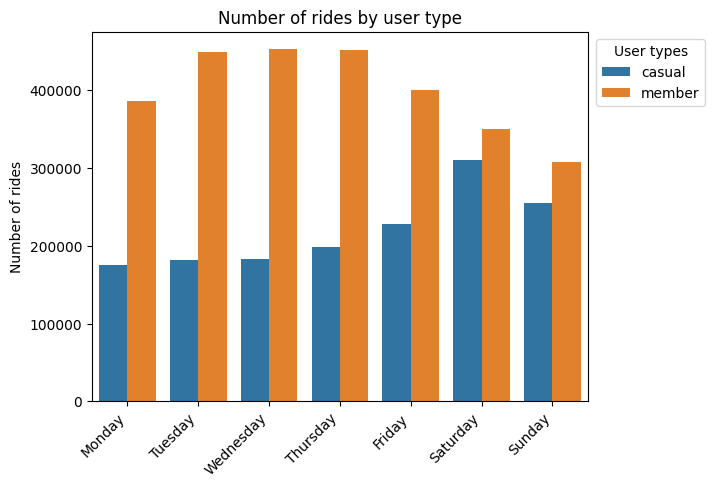

In [ ]:
# Setting the order of the days of the week
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregating the data and maintaining the groups
grouped_data = bikedata.groupby(['member_casual', 'day_of_week']).size().reset_index(name='number_of_rides')

# Plotting the graph with the specified order
sns.barplot(data=grouped_data, x='day_of_week', y='number_of_rides', hue='member_casual', dodge=True, order=order_of_days)
plt.xlabel('')
plt.ylabel('Number of rides')
plt.title('Number of rides by user type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='User types', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

**Observing the Avarage distance by user type**

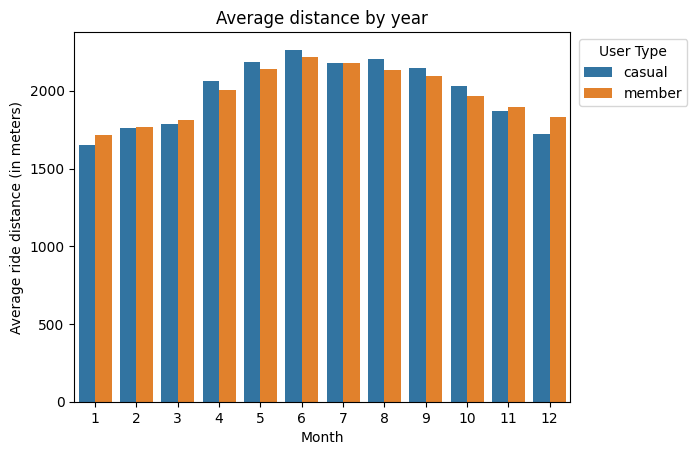

In [ ]:
# Grouping data by member and month and calculating the average trip length
grouped_data = bikedata.groupby(['member_casual', 'month'])['ride_distance'].mean().reset_index()

# Plotting the graph
sns.barplot(data=grouped_data, x='month', y='ride_distance', hue='member_casual', dodge=True)
plt.xlabel('Month')
plt.ylabel('Average ride distance (in meters)')
plt.title('Average distance by year')
plt.legend(title='User Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

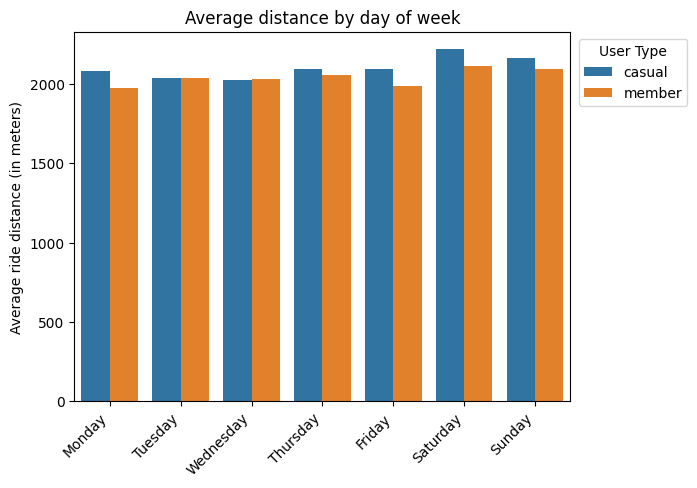

In [ ]:
# Setting the order of the days of the week
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping data by member and month and calculating the average trip length
grouped_data = bikedata.groupby(['member_casual', 'day_of_week'])['ride_distance'].mean().reset_index()

sns.barplot(data=grouped_data, x='day_of_week', y='ride_distance', hue='member_casual', order=order_of_days, dodge=True)
plt.xlabel('')
plt.ylabel('Average ride distance (in meters)')
plt.title('Average distance by day of week')
plt.legend(title='User Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

**Observing the average length by user type**

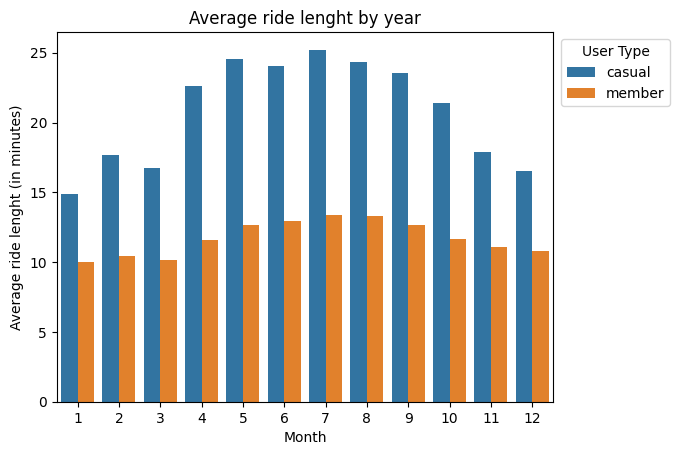

In [ ]:
# Converting the 'ride length' column from seconds to minutes
bikedata['ride_length_min'] = bikedata['ride_length'] / 60

# Grouping data by member and month and calculating the average trip length
grouped_data = bikedata.groupby(['member_casual', 'month'])['ride_length_min'].mean().reset_index()

# Plotting the graph
sns.barplot(data=grouped_data, x='month', y='ride_length_min', hue='member_casual', dodge=True)
plt.xlabel('Month')
plt.ylabel('Average ride lenght (in minutes)')
plt.title('Average ride lenght by year')
plt.legend(title='User Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

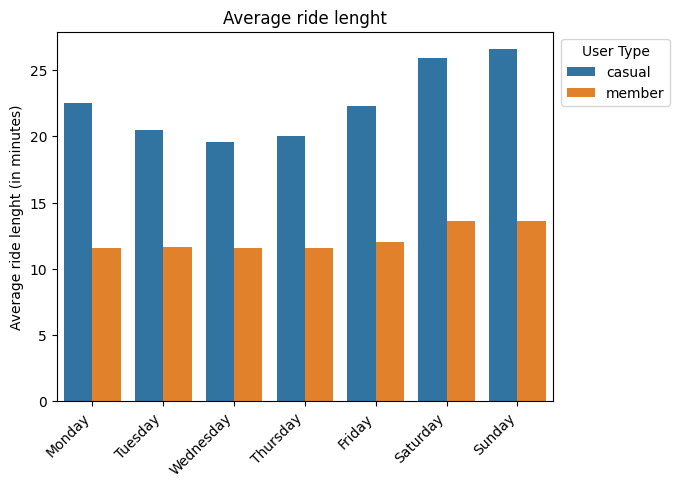

In [ ]:
# Setting the order of the days of the week
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting the 'ride_length' column from seconds to minutes
bikedata['ride_length_min'] = bikedata['ride_length'] / 60

# Grouping data by member and month and calculating the average trip length
grouped_data = bikedata.groupby(['member_casual', 'day_of_week'])['ride_length_min'].mean().reset_index()

# Plotting the graph
sns.barplot(data=grouped_data, x='day_of_week', y='ride_length_min', hue='member_casual', order=order_of_days, dodge=True)
plt.xlabel('')
plt.ylabel('Average ride lenght (in minutes)')
plt.title('Average ride lenght')
plt.legend(title='User Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

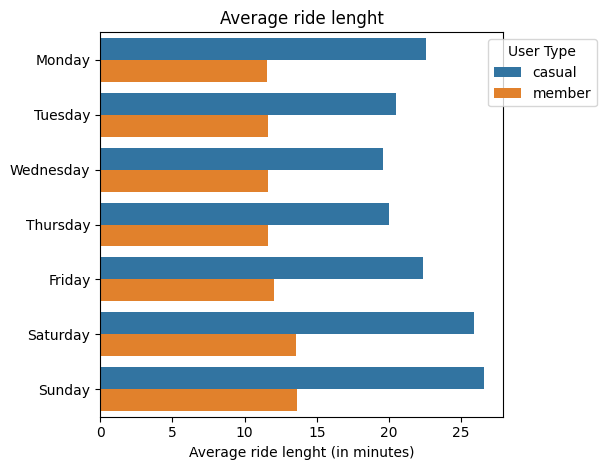

In [9]:
# Setting the order of the days of the week
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting the 'ride_length' column from seconds to minutes
bikedata['ride_length_min'] = bikedata['ride_length'] / 60

# Grouping data by member and day of the week and calculating the average trip length
grouped_data = bikedata.groupby(['member_casual', 'day_of_week'])['ride_length_min'].mean().reset_index()

# Plotting the horizontal bar graph
sns.barplot(data=grouped_data, y='day_of_week', x='ride_length_min', hue='member_casual', order=order_of_days, dodge=True)
plt.xlabel('Average ride lenght (in minutes)')
plt.ylabel('')
plt.title('Average ride lenght')
plt.legend(title='User Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

**Top 5 starting and ending stations**

In [4]:
# Calculando as contagens de início de estação
top_start_station = bikedata.groupby(['start_station_name', 'member_casual']).size().reset_index(name='row_count')
top_start_station = top_start_station.sort_values(by='row_count', ascending=False)

# Calculando as contagens de fim de estação
top_end_station = bikedata.groupby(['end_station_name', 'member_casual']).size().reset_index(name='row_count')
top_end_station = top_end_station.sort_values(by='row_count', ascending=False)

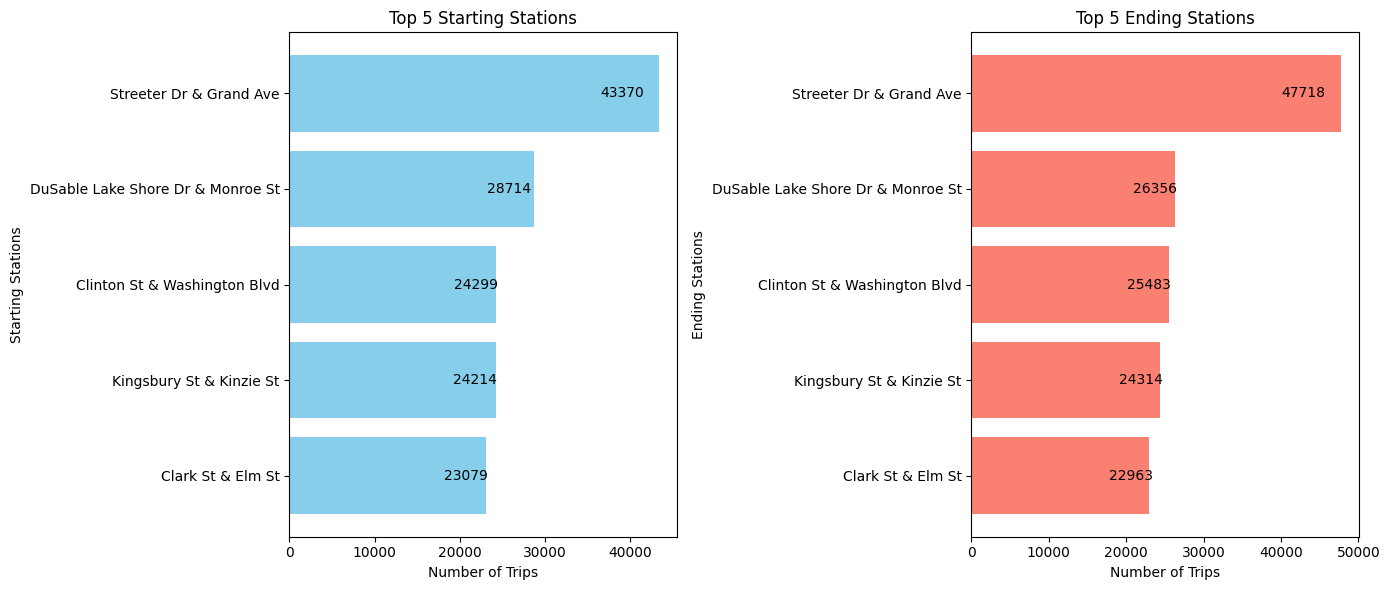

In [8]:
# Defining the Top 5 starting and ending stations
top5_start_stations = top_start_station.head(5).sort_values(by='row_count', ascending=True)
top5_end_stations = top_end_station.head(5).sort_values(by='row_count', ascending=True)

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the Top 5 starting stations
bars1 = axs[0].barh(top5_start_stations['start_station_name'], top5_start_stations['row_count'], color='skyblue')

# Adding values inside the bars
for bar in bars1:
    xval = bar.get_width()
    axs[0].text(xval * 0.9, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='center', va='center')

axs[0].set_xlabel('Number of Trips')
axs[0].set_ylabel('Starting Stations')
axs[0].set_title('Top 5 Starting Stations')

# Plotting the Top 5 ending stations
bars2 = axs[1].barh(top5_end_stations['end_station_name'], top5_end_stations['row_count'], color='salmon')

# Adding values inside the bars
for bar in bars2:
    xval = bar.get_width()
    axs[1].text(xval * 0.9, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='center', va='center')

axs[1].set_xlabel('Number of Trips')
axs[1].set_ylabel('Ending Stations')
axs[1].set_title('Top 5 Ending Stations')

plt.tight_layout()
plt.show()

**Plotting map**

In [10]:
import folium
from folium.plugins import HeatMap

In [ ]:
# Create a map
mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=6)

# Create a list of all departure and arrival coordinates
dep_coordinates = bikedata[['start_lat', 'start_lng']].values.tolist()
arr_coordinates = bikedata[['end_lat', 'end_lng']].values.tolist()
coordinates = dep_coordinates + arr_coordinates

# Create a heatmap with the coordinates
heatmap = HeatMap(coordinates)

# Add the heatmap to the map
mapa.add_child(heatmap)

# Save the map as an HTML file
mapa.save('heat_map.html')

In [11]:
def criar_mapa_de_calor(data, filename):
    # Lista de coordenadas de partida e chegada
    dep_coordinates = data[['start_lat', 'start_lng']].values.tolist()
    arr_coordinates = data[['end_lat', 'end_lng']].values.tolist()
    coordinates = dep_coordinates + arr_coordinates

    # Criar heatmap com as coordenadas
    heatmap = HeatMap(coordinates)

    # Criar e salvar o mapa como arquivo HTML
    mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=6)
    mapa.add_child(heatmap)
    mapa.save(filename)

# Filtrar dados para membros e clientes casuais (não membros)
membros_data = bikedata[bikedata['member_casual'] == 'member']
casuais_data = bikedata[bikedata['member_casual'] == 'casual']

# Criar mapa de calor para membros
criar_mapa_de_calor(membros_data, 'heat_map_membros.html')

# Criar mapa de calor para clientes casuais
criar_mapa_de_calor(casuais_data, 'heat_map_casuais.html')